Mean is found. 
Now make a line plot of the same axis showing the mean of each parameters
Then std.dev

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ip.csv")
years = df['year']
keys = df.keys().values
means_list = df.mean(axis=0).values
std_list = df.std(axis=0).values

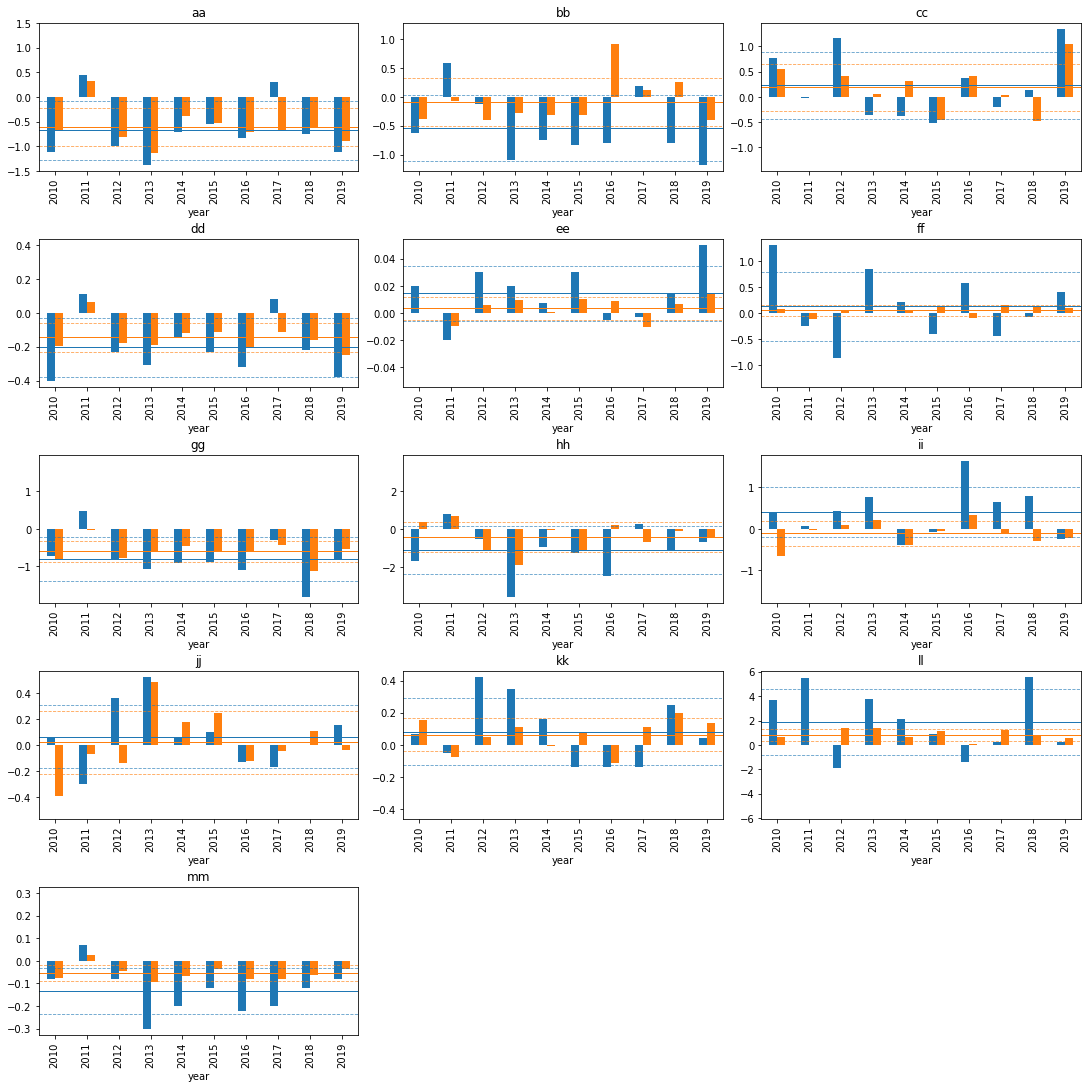

In [3]:
fig = plt.figure(figsize=(15,15), constrained_layout= True)
i = 0 # Only to define the subplot position

for count in range(1, len(keys), 2):
    i += 1 

    ## Find Y-limit of subplot: checking value range of both variables
    extents = []
    extents.append(abs(df[keys[count]].min()))
    extents.append(abs(df[keys[count]].max()))
    extents.append(abs(df[keys[count+1]].min()))
    extents.append(abs(df[keys[count+1]].max()))
    limit = max(extents) + (max(extents))/10  # Adding 10% of limit for aesthetics 

    ## Divide the space into 5x3. Then the graph position
    axis = fig.add_subplot(5,3,i)

    ## Bar plot. Parameters:https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html
    graph = df.plot(x = 'year', 
                    y = [keys[count],keys[count+1]], 
                    kind = 'bar', 
                    ax = axis, 
                    legend = None, 
                    ylim = ((-1 * limit), limit),
                    grid = False)
    
    graph_title = keys[count][:-1] # Removes last letter
    graph.set_title(graph_title, loc = 'center')

    ## Mean values. Parameters: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
    mean_var1 = plt.axhline(means_list[count], 
                            linestyle='-', 
                            c = '#1F77B4',
                            alpha = 1,
                            linewidth = 1) # Check antialiased =True/ False

    mean_var2 = plt.axhline(means_list[count+1], 
                            linestyle='-', 
                            c = '#ff7f0e',
                            alpha = 1,
                            linewidth = 1)
    
    ## Std. devs. as horizontal lines
    std_alpha = 0.7
    std_linewidth = 0.85
    pstd_var1 = plt.axhline(means_list[count]+std_list[count], 
                            linestyle='--', 
                            c = '#1F77B4',
                            alpha = std_alpha,
                            linewidth = std_linewidth) 
    pstd_var2 = plt.axhline(means_list[count+1]+std_list[count+1], 
                            linestyle='--', 
                            c = '#ff7f0e',
                            alpha = std_alpha,
                            linewidth = std_linewidth) 
    mstd_var1 = plt.axhline(means_list[count]-std_list[count], 
                            linestyle='--', 
                            c = '#1F77B4',
                            alpha = std_alpha,
                            linewidth = std_linewidth) 
    mstd_var2 = plt.axhline(means_list[count+1]-std_list[count+1], 
                            linestyle='--', 
                            c = '#ff7f0e',
                            alpha = std_alpha,
                            linewidth = std_linewidth) 

    # ## Draw a zero line
    # zero_line = plt.axhline(0, linestyle='-', 
    #                         c = 'black',
    #                         alpha = 0.5,
    #                         linewidth = 1)

# Exporting as SVG file
plt.savefig('subplots.svg', dpi=550)